In [7]:
%matplotlib inline
import warnings
from matplotlib import font_manager, rc

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [1]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 미국의 거시경제지표 데이터셋
#   TOTEMP - Total Employment
#   GNPDEFL - GNP deflator
#   GNP - GNP
#   UNEMP - Number of unemployed
#   ARMED - Size of armed forces
#   POP - Population
#   YEAR - Year (1947 - 1962)

dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


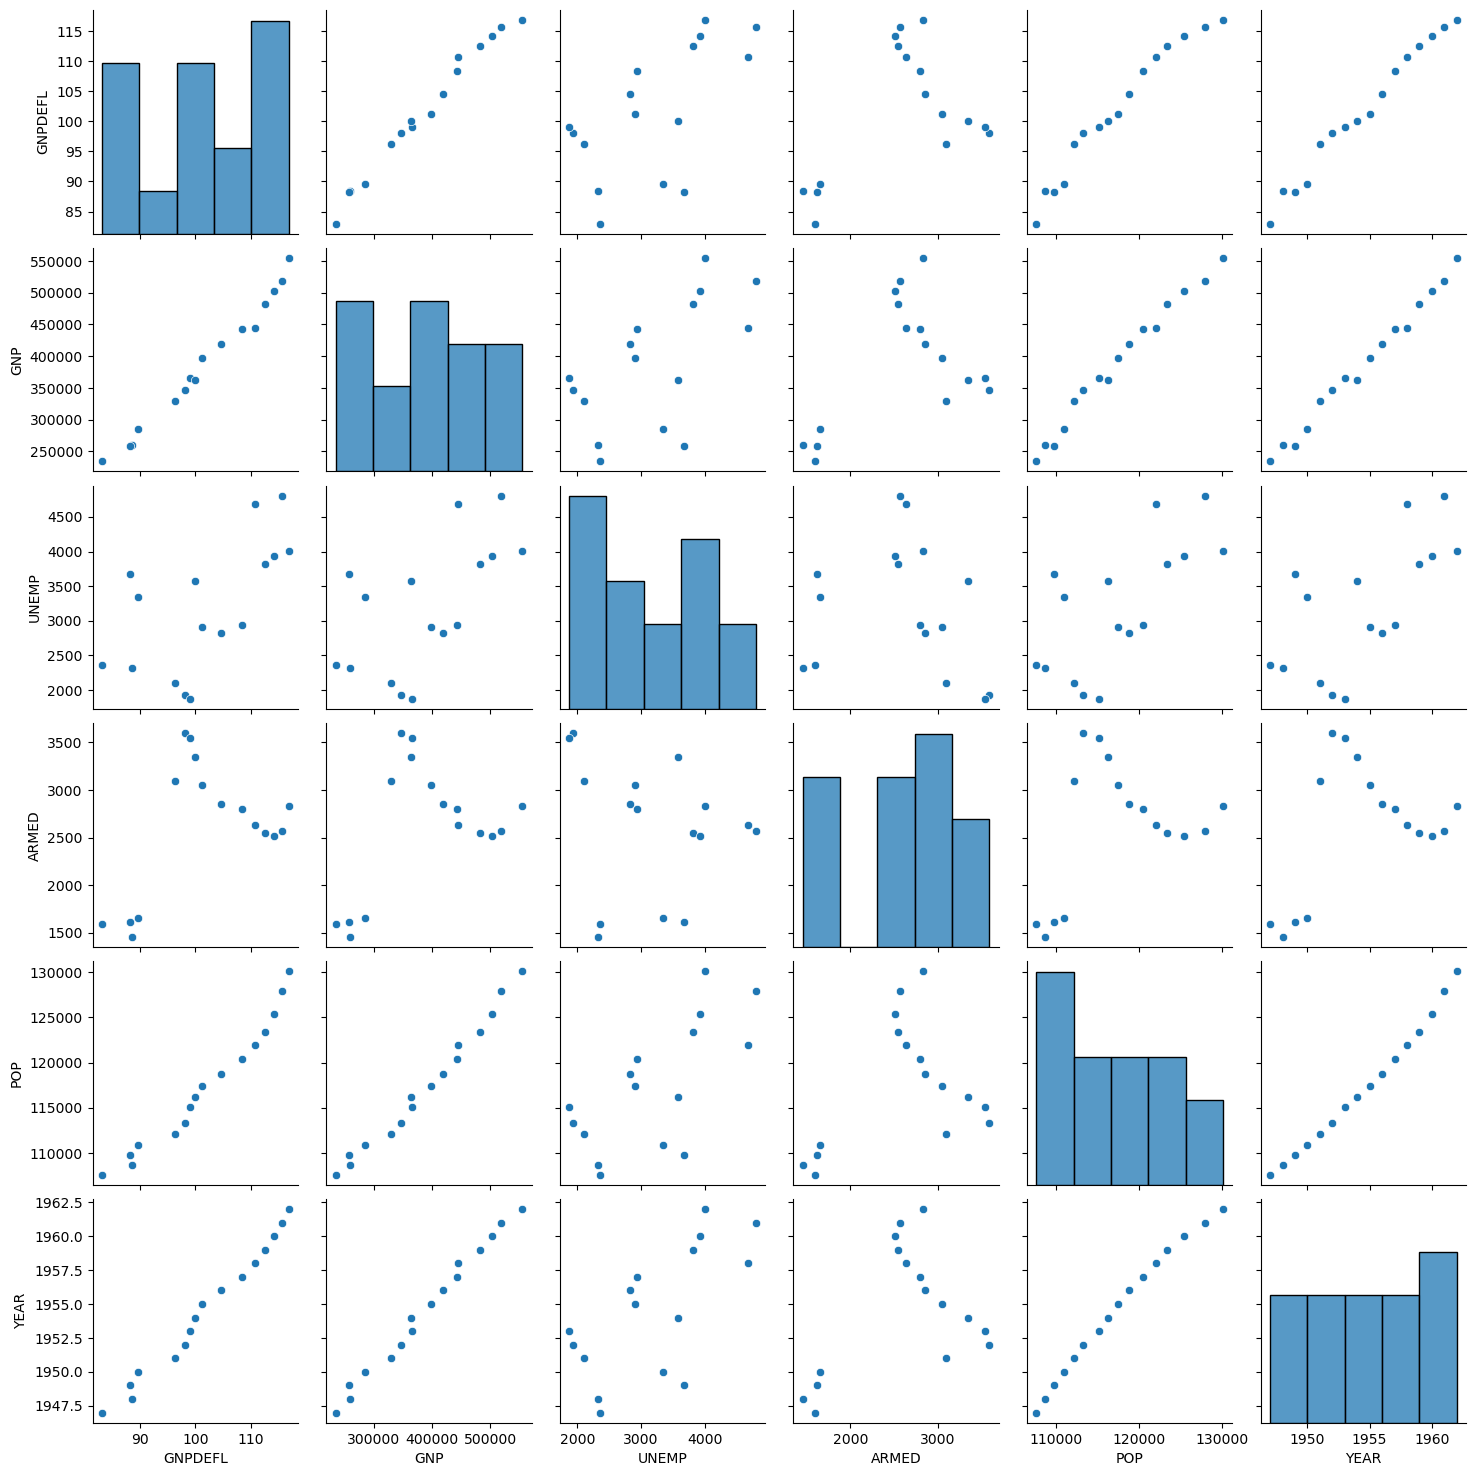

In [2]:
sns.pairplot(dfX)
plt.show()
# 독립변수들간의 상관관계가 강한 데이터셋

In [3]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


<AxesSubplot:>

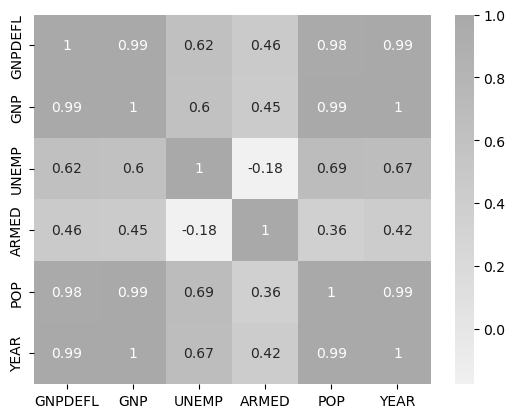

In [4]:
%matplotlib inline
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)

In [8]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result1 = get_model1(3)
result1.summary()
# 다중공선성 문제로 인하여 조건수(conditional number)가 증가한다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Wed, 08 Mar 2023   Prob (F-statistic):             0.0366
Time:                        13:19:13   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.150      -5e+07    2.53e+07
GNPDEFL      106.2620     75.709      1.404      0.394    -855.708    1068.232
POP            2.2959      0.725      3.167      0.195      -6.915      11.506
GNP           -0.3997      0.120     -3.339      0.185      -1.920       1.121
YEAR        6300.6231   1498.900      4.203      0.149   -1.27e+04    2.53e+04
ARMED         -0.2450      0.402     -0.609      0.652      -5.354       4.864
UNEMP         -6.3311      1.324     -4.782      0.131     -23.153      10.491
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.304
Skew:                           0.300   Prob(JB):                        0.859
Kurtosis:                       2.258   Cond. No.                     2.01e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Total Sum of Square(종속변수 y의 분산)
# Residual Sum of Square(잔차의 분산, 오차의 크기)
def calc_r2(df_test, result):
    target = df.loc[df_test.index].TOTEMP   # 실제값
    predict_test = result.predict(df_test)  # 예측값
    RSS = ((predict_test - target)**2).sum()    # 잔차의 분산
    TSS = ((target - target.mean())**2).sum()   # 실제값의 분산
    return 1 - RSS / TSS    # 결정계수

train1 = []
test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    train1.append(calc_r2(df_train, result))
    test1.append(calc_r2(df_test, result))

# 과적합 문제가 있음
print(train1)
print(test1)

[0.9987038742050295, 0.9980503554982977, 0.9984751044825552, 0.9996192348457819, 0.9991092103164816, 0.9970491339294602, 0.9990327438989923, 0.9995684924269972, 0.9990043448072191, 0.9998945799042561]
[0.9815050656844267, 0.973849754306501, 0.9879366370011322, 0.7588861967876803, 0.9807206089304095, 0.8937889315063796, 0.8798563810571698, 0.931466577896602, 0.8608525682213877, 0.9677198735128874]


In [10]:
# 다중 공선성을 해결하는 방법

# 변수 선택으로 의존적인 변수 제거
# PCA(주성분분석)
# 정규화

In [11]:
# VIF(Variance Inflation Factor) : 다른 변수에 의존적일수록 커진다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [12]:
# VIF와 pvalue가 높은 GNPDEFL,POP,YEAR 변수들을 제거하고 스케일링 처리한 모형
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result2 = get_model2(3)
print(result2.summary())
# 성능이 향상됨

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           0.000231
Time:                        14:39:03   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

In [13]:
# 모형의 정확도가 개선됨, 과적합이 해소됨
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

[0.9763608388904903,
 0.9841984331185691,
 0.9687069366140135,
 0.939730405320177,
 0.9773357061188462,
 0.9561262155732314,
 0.9803852496698645,
 0.9917361722470804,
 0.9837134067639469,
 0.9789512977093211]

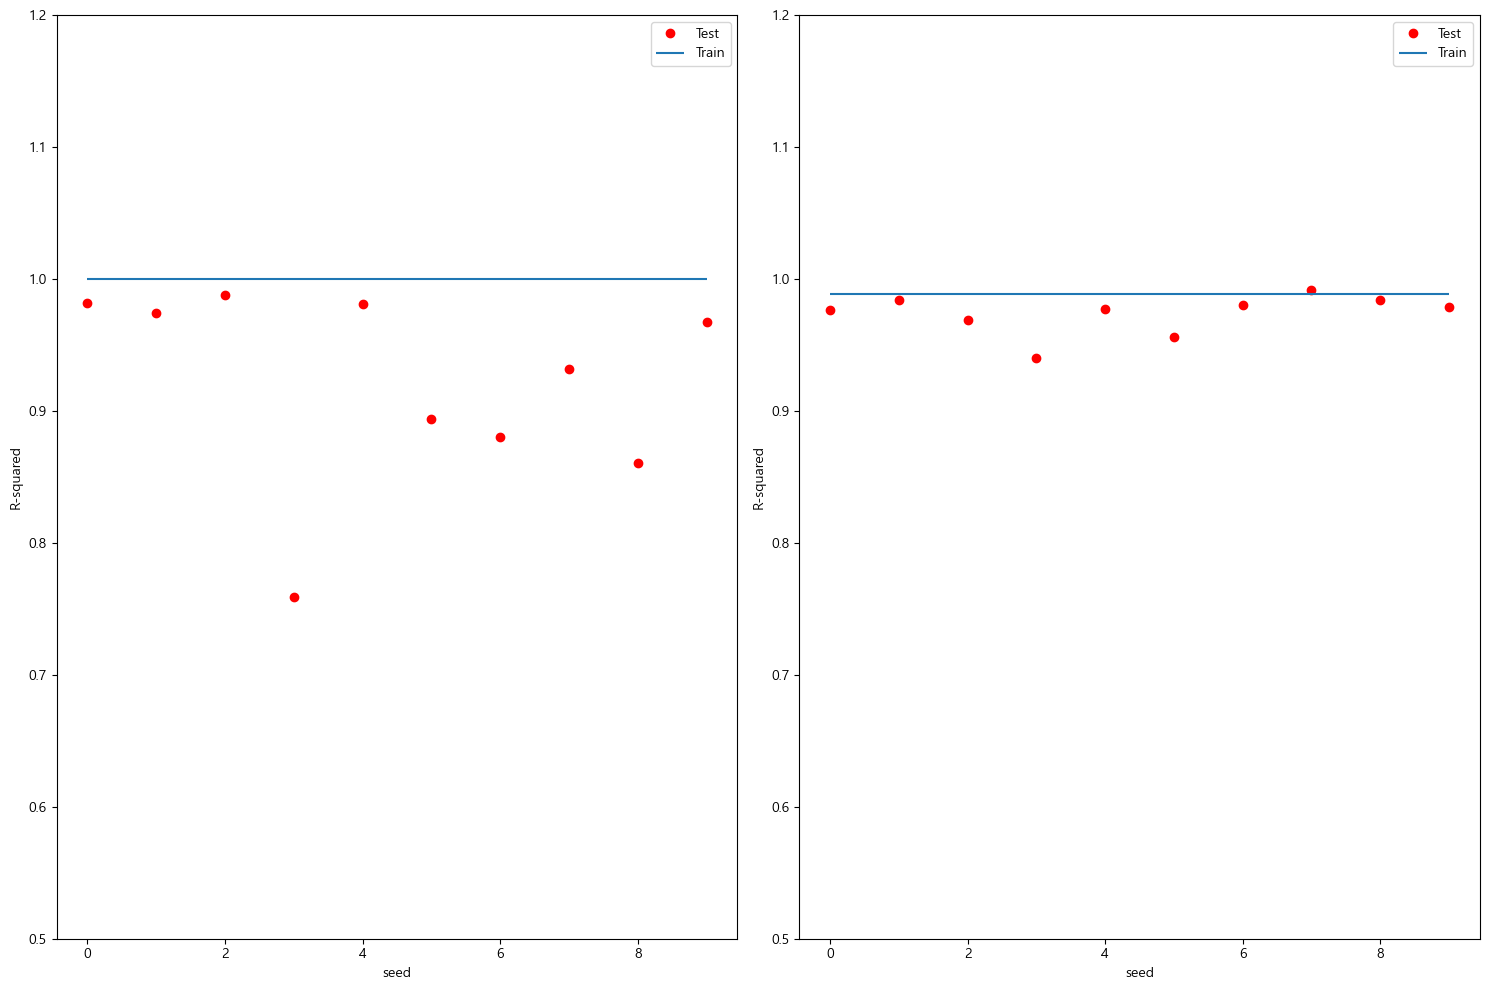

In [14]:
# 다중공선성 제거 전
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(test1, 'ro', label="Test")
plt.hlines(result1.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

# 다중공선성 제거 후
plt.subplot(122)
plt.plot(test2, 'ro', label="Test")
plt.hlines(result2.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
 "scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
 "scale(NOX) + scale(RM) + scale(AGE) + " + \
 "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
 "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [16]:
dfX.corr()

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scale(CRIM),NaN,1.000000,0.871061,-0.200469,-0.152919,0.406583,0.420972,-0.219247,0.352734,-0.464239,0.625505,0.582764,0.280251,-0.385064,0.395543,-0.055892
scale(I(CRIM ** 2)),NaN,0.871061,1.000000,-0.082634,-0.062511,0.172073,0.174481,-0.086407,0.158977,-0.224621,0.279830,0.258144,0.131323,-0.191856,0.181699,-0.041163
scale(ZN),NaN,-0.200469,-0.082634,1.000000,0.951970,-0.533828,-0.516604,0.311991,-0.569537,0.590655,-0.311948,-0.314563,-0.390312,0.175520,-0.477706,-0.042697
scale(I(ZN ** 2)),NaN,-0.152919,-0.062511,0.951970,1.000000,-0.436453,-0.433310,0.267548,-0.491017,0.496834,-0.252418,-0.235141,-0.316083,0.132351,-0.416080,-0.040274
scale(INDUS),NaN,0.406583,0.172073,-0.533828,-0.436453,1.000000,0.763651,-0.391676,0.644779,-0.761286,0.595129,0.720760,0.366747,-0.356977,0.597429,0.062938
scale(NOX),NaN,0.420972,0.174481,-0.516604,-0.433310,0.763651,1.000000,-0.302188,0.731470,-0.831977,0.611441,0.668023,0.162044,-0.380051,0.577072,0.091203
scale(RM),NaN,-0.219247,-0.086407,0.311991,0.267548,-0.391676,-0.302188,1.000000,-0.240265,0.256584,-0.209847,-0.292048,-0.356109,0.128069,-0.664528,0.091251
scale(AGE),NaN,0.352734,0.158977,-0.569537,-0.491017,0.644779,0.731470,-0.240265,1.000000,-0.778243,0.456022,0.506456,0.237448,-0.273534,0.606806,0.086518
scale(np.log(DIS)),NaN,-0.464239,-0.224621,0.590655,0.496834,-0.761286,-0.831977,0.256584,-0.778243,1.000000,-0.560335,-0.619008,-0.215174,0.324841,-0.524343,-0.087037


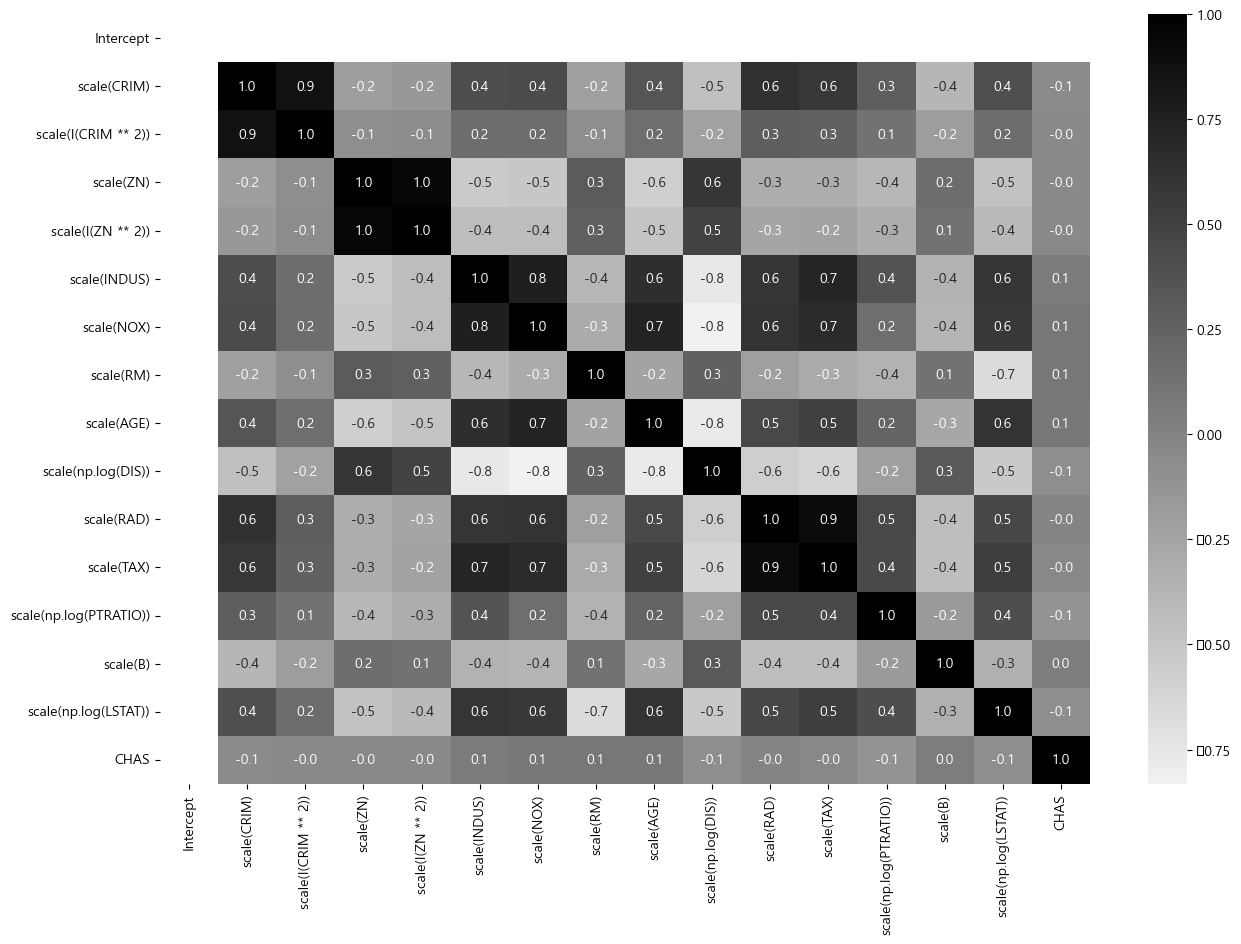

In [17]:
plt.figure(figsize=(15,10))
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [18]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.079395,CHAS
1,1.080210,Intercept
2,1.387924,scale(B)
3,1.906591,scale(np.log(PTRATIO))
4,2.156423,scale(RM)
5,3.364921,scale(AGE)
6,3.373444,scale(np.log(LSTAT))
7,4.087754,scale(INDUS)
8,4.845394,scale(NOX)
9,5.427154,scale(np.log(DIS))


In [19]:
# VIF가 높은 값들을 제거하기 전의 모형
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     146.2
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          6.88e-170
Time:                        15:08:48   Log-Likelihood:                 165.33
No. Observations:                 506   AIC:                            -298.7
Df Residuals:                     490   BIC:                            -231.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [20]:
# VIF가 높은 변수들을 제거하고 최종적으로 선택한 독립변수들로 만든 모형
cols = ["Intercept", "CHAS", "scale(B)", "scale(CRIM)", "scale(AGE)",
 "scale(np.log(PTRATIO))", "scale(RM)", "scale(np.log(LSTAT))"]
 
model_boston2 = sm.OLS(np.log(dfy), dfX[cols])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())
#결정계수: 81.7% => 77.4%
#조건수: 13.7 => 6.71

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     243.1
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          3.61e-156
Time:                        15:09:01   Log-Likelihood:                 111.04
No. Observations:                 506   AIC:                            -206.1
Df Residuals:                     498   BIC:                            -172.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3